## Step 2: make your autoencoder

### Background
An autoencoder is a neural network that takes an input, encodes it into a lower-dimensional latent space through "encoding" layers, and then attempts to reconstruct the original input using "decoding" layers. Autoencoders are often used for dimensionality reduction.

### Your task
You will train a 64x16x64 autoencoder on the digits dataset. All of the following work should be done in a Jupyter Notebook.

### To-do
 - Load the digits dataset through sklearn using sklearn.datasets.load_digits().
 - Split the data into training and validation sets.
 - Generate an instance of your NeuralNetwork class with a 64x16x64 autoencoder architecture.
 - Train your autoencoder on the training data.
 - Plot your training and validation loss by epoch.
 - Quantify your average reconstruction error over the validation set.
 - Explain why you chose the hyperparameter values you did.


#### Imports and helper functions

In [554]:
# %load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from nn import io
import re
from collections import Counter
from nn.nn import NeuralNetwork
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [507]:
# timing function
def display_run_time(s,e,task):
    rt=(e-s)
    if rt>=60:
        rt=rt/60
        print(f"{task}: {rt} m")
    else:
        print(f"{task}: {rt} s")

#### Load data

In [508]:
# import digits library
digits=load_digits()

# get data (normalize with max value such that values range from 0 to 1) and the values
digits_data=digits['data']
digits_data=digits_data/digits_data.max()
digits_target=digits['target']

# print data info
print("Data dimensions: ", digits_data.shape)
print("Number of samples: ", len(digits_target))

Data dimensions:  (1797, 64)
Number of samples:  1797


#### Initialize NN and split data for training/validation

In [555]:
# create architecture of our neural network; the autoencoder goes from 64 to 16 to 64; it has 1 hidden layer.
nn_arch=[{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}] # best: sigmoid, relu

# initialize neural network and set hyperparameters
lr=0.1
seed=343
batch_size=140
epochs=1000
loss_function='mse'
nn=NeuralNetwork(nn_arch, lr=lr, seed=seed, batch_size=batch_size, epochs=epochs, loss_function=loss_function) # loss function can be mse or bce

In [556]:
# generate train and val sets; note, since we are testing the reconstruction error, we don't need y_train and y_val, we are seeing how well X_trian then X_val match the original (how well they are reconstructed)
# our features are along the columns and batch_size along the rows
X_train, X_val, y_train, y_val=train_test_split(np.array(digits_data), np.array(digits_target), test_size=0.3, random_state=543)

# print dimensions
print("X_train dimensions: ", X_train.shape)
print("X_val dimensions: ", X_val.shape)

X_train dimensions:  (1257, 64)
X_val dimensions:  (540, 64)


#### Train model and get the loss history

In [557]:
# train the model - note, our y for the training and validation set is the same as the X since we are computing reconstruction error
start_time=time.time()
per_epoch_loss_train, per_epoch_loss_val=nn.fit(X_train, X_train, X_val, X_val)
end_time=time.time()
display_run_time(start_time,end_time,f"Training NN RT (lr: {lr}, batch_size: {batch_size}, epochs: {epochs}, loss_function: {loss_function}")

y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (137, 64)
y_hat_train_for_loss (137, 64)
y_train_batch (137, 64)
y_hat_val (540, 64)
y_val (540, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_loss (140, 64)
y_train_batch (140, 64)
y_hat_train (140, 64)
y_hat_train_for_lo

In [558]:
# create loss dataframe
loss_data_df=pd.DataFrame(data=[per_epoch_loss_train, per_epoch_loss_val]).T.reset_index()
loss_data_df.columns=["epoch", "per_epoch_loss_train", "per_epoch_loss_val"]

#### Plot loss history

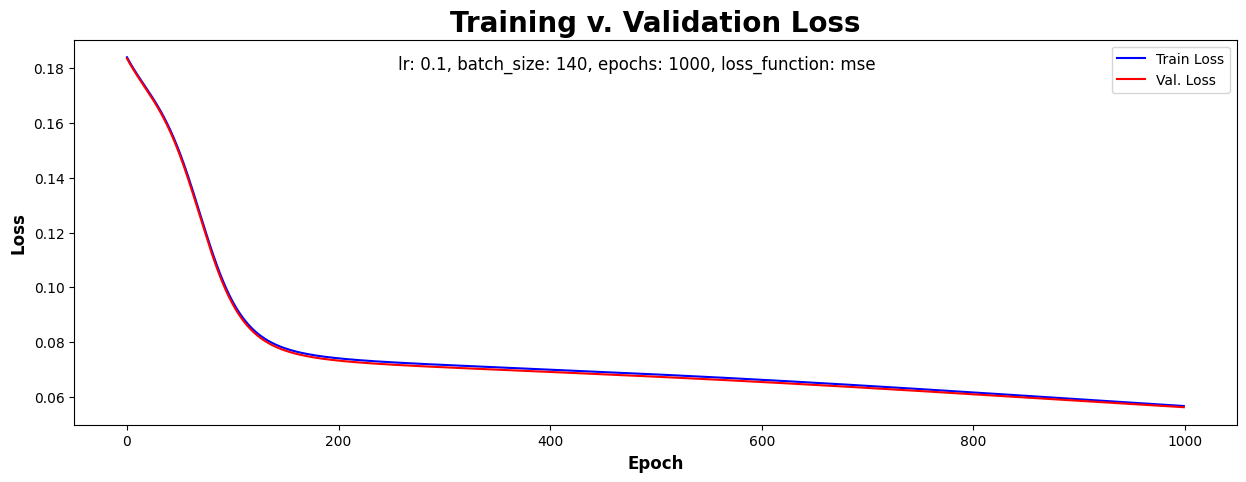

In [559]:
# plot loss
plt.rcParams["figure.figsize"] = (15,5)
sns.lineplot(data=loss_data_df, x="epoch", y="per_epoch_loss_train", label="Train Loss", color='blue')
sns.lineplot(data=loss_data_df, x="epoch", y="per_epoch_loss_val", label="Val. Loss", color='red')
plt.title(f"Training v. Validation Loss", weight='bold', fontsize='20')
plt.suptitle(f"lr: {lr}, batch_size: {batch_size}, epochs: {epochs}, loss_function: {loss_function}", fontsize=12, y=0.85)
plt.xlabel("Epoch", weight='bold', fontsize='12')
plt.ylabel("Loss", weight='bold', fontsize='12')
plt.show()


#### Compute average reconstruction error and see todo and hyperparameter section 

In [495]:
print("Average reconstruction loss over the validation set: ", np.mean(per_epoch_loss_val))

Average reconstruction loss over the validation set:  0.17006027561177234


#### Hyperparameter selection

 - Explain why activation functions and loss function were chosen
 - How do you choose optimal learning rate, batch_size, epoch, test_size, etc.?
 - What would happen if we didn't average b but instead updated every b value independently? This doesn't really make sense actually because each layer (assuming fully connected NN) has the same number of biases as the number of neurons in a given layer. 

Epoch 1/100


c:\Users\chati\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.1286 - val_loss: 0.0667
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0691 - val_loss: 0.0622
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0621 - val_loss: 0.0592
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0584 - val_loss: 0.0540
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0539 - val_loss: 0.0503
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0504 - val_loss: 0.0470
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0468 - val_loss: 0.0458
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0461 - val_loss: 0.0443
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0451 - val_loss: 0.0437
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0446 - val_loss: 0.0438
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0442 - val_loss: 0.0436
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0438 - val_loss: 0.0437
E

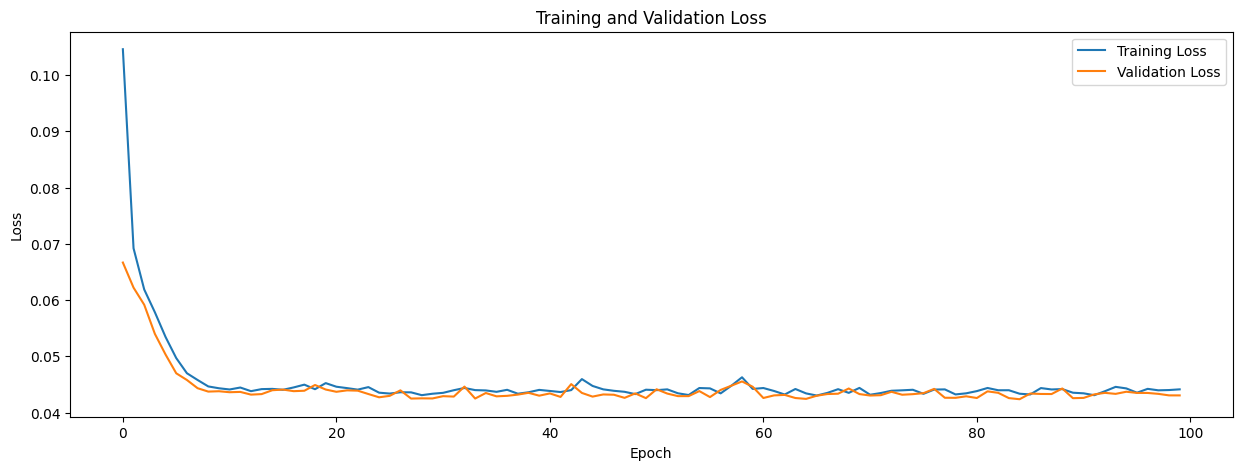

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# tensorflow version 
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(64,)),
    layers.Dense(64, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss='mean_squared_error')

history = model.fit(X_train, X_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, X_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
